# sklearn_classification_models_for_seasonal_selections

https://www.projectpro.io/article/multi-class-classification-python-example/547#mcetoc_1fpjsn4g8g

https://www.educba.com/keras-sequential/

###### Load modules 

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures



import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
date_str = now.strftime("%Y%m%d")
date_time_str = now.strftime("%Y%m%d_%H%M%S")
print(date_str)
print(date_time_str)

20230225
20230225_124234


### Import data

In [3]:
#date_str = "20230201"
drive = "D"
data_date = "20230205"
# define output directory
output_dir = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date_str)
export_dir = os.path.join(output_dir, date_time_str)

# data dir
dir_ = r"{0}:\cdu\data\zonal_stats\output\{1}\ml_data_si_dir".format(drive, data_date)

index_ = 1


In [4]:
def mk_dir_fn(dir_):
    """ Create a new directory if one does not already exist. """
    print("pathway ", dir_)
    if not os.path.isdir(dir_):
        os.mkdir(dir_)

        
def export_csv_fn(list_, dir_, file_name):
    
    """ Create and export path from directory and file name and exports csv with no dropping the index column. """
    
    df_final = pd.concat(list_, axis =0)    
    output_path = os.path.join(dir_, file_name)
    df_final.to_csv(os.path.join(output_path), index=False)
    print("File output to: ", output_path)
    
    return df_final

## Set output file locations

## Load data

In [5]:
file_list = []
for f in glob(os.path.join(dir_, "*reg.csv")):
    print(f)
    file_list.append(f)


D:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\s_mean_max_min_med_std__fnm_fms_si_reg.csv
D:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\r2_bs_mean_max_min_med_std__fnm_fms_si_reg.csv
D:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\s_mean_max_min_med_std_met_fnm_fms_si_reg.csv
D:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\r2_bs_mean_max_min_med_std_met_fnm_fms_si_reg.csv


In [6]:
_, file_name = os.path.split(file_list[index_])
split_list = file_name.split(".")
data_set = split_list[0]

In [7]:
data_set

'r2_bs_mean_max_min_med_std__fnm_fms_si_reg'

In [8]:
ml_rf_reg_dir= os.path.join(output_dir, "ml_svc_reg_dir")
data_set_dir= os.path.join(ml_rf_reg_dir, "data_set")
export_ml_rf_reg_dir = os.path.join(data_set_dir, date_time_str)
# plots_dir = os.path.join(export_ml_rf_reg_dir, data_set)
all_plots_dir = os.path.join(export_ml_rf_reg_dir, "all_plots")
# no_tern_plots_dir = os.path.join(plots_dir, "no_tern")


In [9]:
mk_dir_fn(output_dir)
mk_dir_fn(ml_rf_reg_dir)
mk_dir_fn(data_set_dir)
mk_dir_fn(export_ml_rf_reg_dir)
# mk_dir_fn(plots_dir)
mk_dir_fn(all_plots_dir)
# mk_dir_fn(no_tern_plots_dir)

pathway  D:\cdu\data\zonal_stats\output\20230225
pathway  D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir
pathway  D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set
pathway  D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234
pathway  D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234\all_plots


In [10]:
export_ml_rf_reg_dir

'D:\\cdu\\data\\zonal_stats\\output\\20230225\\ml_svc_reg_dir\\data_set\\20230225_124234'

In [11]:
df = pd.read_csv(file_list[index_], header=0)

In [12]:
df

,target,site,uid,date,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0.00,nt001,71,20110523,13.78,47.00,25.85,23.87,8.48,7.27,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0.00,barkely01,24,20111025,0.75,2.87,1.69,1.49,0.70,4.38,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0.00,barkely04,27,20111026,2.12,6.42,4.37,4.47,1.22,5.93,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
3,0.00,barkely03,26,20111026,0.75,3.29,1.82,1.64,0.70,3.66,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149
4,0.00,barkely02,25,20111026,2.12,13.78,4.97,4.73,2.43,3.13,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,20805.22,ntadac0002,79,20160506,15.54,42.39,29.12,29.27,6.84,16.05,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,30472.45,ntaarp0001,75,20160602,27.61,38.92,34.75,34.33,3.24,17.31,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,24414.13,ntaarp0002,76,20160602,9.06,22.31,14.40,14.21,3.60,9.74,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,17598.35,ntaarp0003,77,20160603,5.26,25.45,13.08,12.11,5.79,9.61,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


slope:  398.39405526585966
intersept:  -1545.2575127961409
r2:  0.6680461286822867
P_value:  6.104388470146404e-23
std error:  34.54675999706051


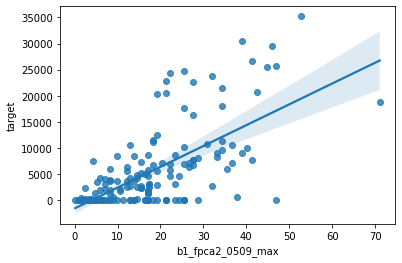

In [13]:
value_y = 'target'
value_x = 'b1_fpca2_0509_max'
sns.regplot(x= value_x, y=value_y, data=df)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

print("slope: ", slope)
print("intersept: ", intercept)
print("r2: ", r_value)
print("P_value: ", p_value)
print("std error: ", std_err)

In [14]:
df_ml = df.copy(deep=True)

### Set variables to plot

## Choose which data set to run the models from

In [15]:
df_ml.head(5)

,target,site,uid,date,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0.00,nt001,71,20110523,13.78,47.00,25.85,23.87,8.48,7.27,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0.00,barkely01,24,20111025,0.75,2.87,1.69,1.49,0.70,4.38,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0.00,barkely04,27,20111026,2.12,6.42,4.37,4.47,1.22,5.93,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
3,0.00,barkely03,26,20111026,0.75,3.29,1.82,1.64,0.70,3.66,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149
4,0.00,barkely02,25,20111026,2.12,13.78,4.97,4.73,2.43,3.13,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007


In [16]:
# drop some of the unwanted values
df_ml.drop(['site', 'uid', 'date'], axis=1, inplace=True) # 'date',
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

In [17]:
df_ml

,target,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,b1_h99a_01122_max,b1_h99a_01122_mean,b1_h99a_01122_med,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0.00,13.78,47.00,25.85,23.87,8.48,7.27,11.78,9.24,8.86,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0.00,0.75,2.87,1.69,1.49,0.70,4.38,8.97,6.83,7.18,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0.00,2.12,6.42,4.37,4.47,1.22,5.93,8.85,7.68,7.68,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
3,0.00,0.75,3.29,1.82,1.64,0.70,3.66,7.09,4.98,4.85,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149
4,0.00,2.12,13.78,4.97,4.73,2.43,3.13,5.82,4.55,4.43,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,20805.22,15.54,42.39,29.12,29.27,6.84,16.05,20.42,18.75,18.77,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,30472.45,27.61,38.92,34.75,34.33,3.24,17.31,21.59,19.37,19.22,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,24414.13,9.06,22.31,14.40,14.21,3.60,9.74,16.81,13.63,13.79,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,17598.35,5.26,25.45,13.08,12.11,5.79,9.61,20.05,13.89,13.26,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


## Qty of 0 values dataset 

In [18]:
model_data = df_ml
model_data_name = "all_values"

# ## Filter out all taregt == 0 values
model_data = df_ml[df_ml['target']>0]
model_data_name = "no0_values"

# # ## Filter out all taregt == 0 values
# model_data = df_ml[(df_ml['target']>0) & (df_ml['target']!=9)]
# model_data_name = "no0or9_values"


# ## Select a randon number of 0 values
# n = 3
# agb_0 = df_ml[df_ml['target']==0.0].sample(n)
# model_data = pd.concat([df_ml[df_ml['target']>0.0], agb_0])
# model_data_name = f"s{n}_0_values"


model_outputs = os.path.join(export_ml_rf_reg_dir, f"{model_data_name}")
mk_dir_fn(model_outputs)

print(model_outputs)

pathway  D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234\no0_values
D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234\no0_values


In [19]:
#model_data.target.value_counts()

In [20]:
model_data.dropna(inplace=True)

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
model_data

,target,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,b1_h99a_01122_max,b1_h99a_01122_mean,b1_h99a_01122_med,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
5,1894.20,1.79,5.83,2.86,2.48,1.22,3.80,5.20,4.29,4.27,...,-1452928,1452928,400174,-1264158,1238000,1250407,846000,1420098,2149390,2440148
8,1536.15,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2148760,2148760,-267789,-1724138,1148000,1156438,732000,1358238,2373541,2737539
9,1164.24,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2327297,2327297,176162,-1318945,1571000,1235708,877000,1377054,1926203,2153802
10,4736.01,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2063673,2063673,799162,-701031,1106000,1197360,743000,1417038,2593368,3039489
12,1549.09,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-1639267,1639267,1618314,-88940,1673000,2020530,1324000,2256305,3482378,4382641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,20805.22,15.54,42.39,29.12,29.27,6.84,16.05,20.42,18.75,18.77,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,30472.45,27.61,38.92,34.75,34.33,3.24,17.31,21.59,19.37,19.22,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,24414.13,9.06,22.31,14.40,14.21,3.60,9.74,16.81,13.63,13.79,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,17598.35,5.26,25.45,13.08,12.11,5.79,9.61,20.05,13.89,13.26,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


 Define if you are using all variabes or selected variables

In [22]:
# from sklean.model
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = model_data.iloc[:, 1:].astype('float32')
ydata1 = model_data[["target"]].astype('int')
ydata2 = ydata1.values
ydata = ydata2.ravel()

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, train_size=0.70) #, stratify=ydata)  
         
#y_test.value_counts()
# print(X_test.shape, y_test.shape)

In [23]:
def train_model_plot(X_train, y_train, model, str_model, x_limit, y_limit, x_off, y_off):
    
    print("="*50)
    print(str_model)
    print("Train model")
    print("="*50)

    # fit model with training data
    model.fit(X_train, y_train)

    r2 = round(model.score(X_train, y_train), 2)
    mse = round(np.mean((y_train - model.predict(X_train))**2), 2)

   
    print(f"R2: {r2}")
    print(f"MSE: {mse}")
    #print('intercept:', model.intercept_)
    #print('slope:', model.coef_) 


    # plotting the training datat
    plt.title(f"Model: {str_model.replace('_', ' ')} - Data: training")
    plt.scatter(model.predict(X_train), y_train)  
    x = [x_limit,y_limit]
    y = [x_limit, y_limit]

    #sets the limits of the axis
    plt.xlim(x_limit, y_limit)
    plt.ylim(x_limit, y_limit)

    plt.ylabel('Observed target')

    plt.xlabel('Predicted target')

    # 1 for 1 line
    #adding text inside the plot
    plt.text((x_limit + x_off), (y_limit - y_off), f'$R^2 = {round(r2, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {round(mse, 4)}$', fontsize = 12)
#     plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {120}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*3)), f'$n = {len(y_train)}$', fontsize = 12)


    plt.plot(x, y, color = 'r')

    plot_out = os.path.join(model_outputs, f'{str_model}_train_plot.jpg')
    plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
    print(f"plot saved to: {plot_out}")
    plt.show()
    
    
    # ------------------------------------ Predict Test ----------------------------------
    print("="*50)
    print(str_model)
    print("Test model")
    print("="*50)

    
    # call the model
    y_test_predict = model.predict(X_test)


    r2 = model.score(X_test, y_test)
    mse = np.mean((y_test - model.predict(X_test))** 2)
    rmse = np.sqrt(np.mean((y_test_predict - y_test) ** 2))
    bias = np.mean(y_test) - np.mean(y_test_predict)
    print('Predicted data r2 =', r2)
    print('MSE =', mse)
#     print(f"Intercept: {model.intercept_}")
    #print(f"Slope: {model.coef_}")
#     print('RMSE =', format(rmse, '.3f'))
#     print('bias =' , format(bias, '.3f'))
#     print('n =' , len(y_test))


    # r2 = round(rfrLCHM.score(X_1, y_1), 2)
    # mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
    # rmse = round(np.sqrt(np.mean((y2_predict - y_2) ** 2)), 2)
    # bias = round(np.mean(y_2) - np.mean(y2_predict), 2)

    # plotting the training datat
    plt.title(f"Model: {str_model.replace('_', ' ')} - Data: testing")
    
    plt.scatter(y_test_predict, y_test) #, s=10, c='b', marker='o')
    # data for the 1 for 1 line
    x = [x_limit,y_limit]
    y = [x_limit, y_limit]

    #sets the limits of the axis
    plt.xlim(x_limit, y_limit)
    plt.ylim(x_limit, y_limit)
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    # 1 for 1 line

    #adding text inside the plot
    plt.text((x_limit + x_off), (y_limit - y_off), f'$R^2 = {round(r2, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {round(mse, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*3)), f'$RMSE = {round(rmse, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*4)), f'$Bias = {round(bias, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*5)), f'$n = {len(y_test)}$', fontsize = 12)

    plt.plot(x, y, color = 'r')
    plot_out = os.path.join(model_outputs, f'{str_model}_test_plot.jpg')
    plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
    print(f"plot saved to: {plot_out}")
    plt.show()    
    
    
    return str_model, model

Linear_regression
Train model
R2: 0.92
MSE: 3967116.9
plot saved to: D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234\no0_values\Linear_regression_train_plot.jpg


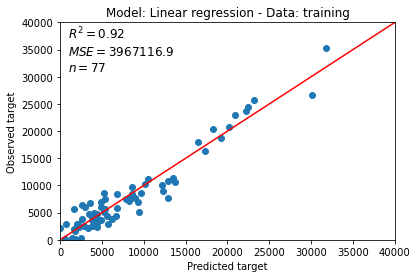

Linear_regression
Test model
Predicted data r2 = -1.7346624587997197
MSE = 226248519.41110322
plot saved to: D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234\no0_values\Linear_regression_test_plot.jpg


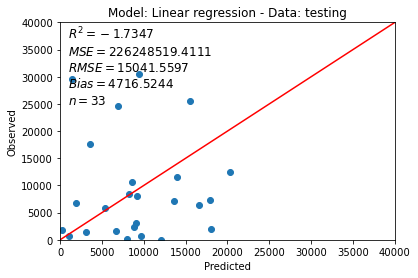

In [24]:
str_model, model = train_model_plot(X_train, y_train, LinearRegression(),
                                    "Linear_regression", 0, 40000, 1000, 3000)

kernel_ridge
Train model
R2: 1.0
MSE: 0.0


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\linear_model\_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


plot saved to: D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234\no0_values\kernel_ridge_train_plot.jpg


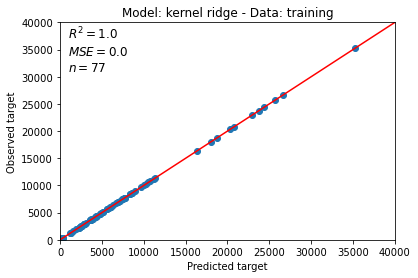

kernel_ridge
Test model
Predicted data r2 = -9.064346627814684
MSE = 832659810.0091034
plot saved to: D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234\no0_values\kernel_ridge_test_plot.jpg


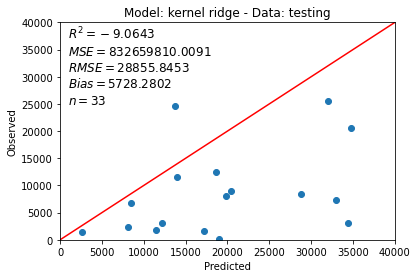

In [25]:
str_model, model = train_model_plot(X_train, y_train, KernelRidge(),
                                    "kernel_ridge", 0, 40000, 1000, 3000)

elastic_net
Train model
R2: 0.98
MSE: 915923.02


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.811e+07, tolerance: 4.019e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


plot saved to: D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234\no0_values\elastic_net_train_plot.jpg


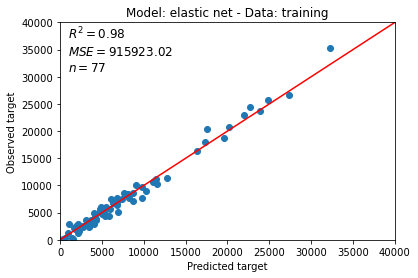

elastic_net
Test model
Predicted data r2 = -0.07393841416551261
MSE = 88850810.58607185
plot saved to: D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234\no0_values\elastic_net_test_plot.jpg


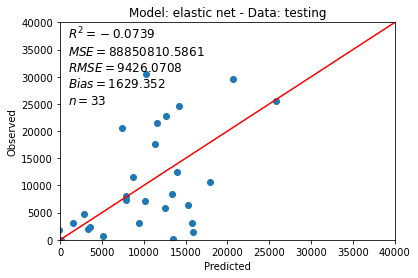

In [26]:

str_model, model = train_model_plot(X_train, y_train, ElasticNet(),
                                    "elastic_net", 0, 40000, 1000, 3000)

bayesian_ridge
Train model
R2: 0.61
MSE: 20609763.91
plot saved to: D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234\no0_values\bayesian_ridge_train_plot.jpg


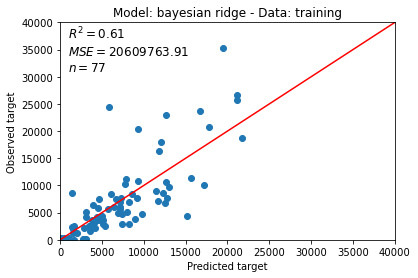

bayesian_ridge
Test model
Predicted data r2 = 0.34429212462705805
MSE = 54249084.92525342
plot saved to: D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234\no0_values\bayesian_ridge_test_plot.jpg


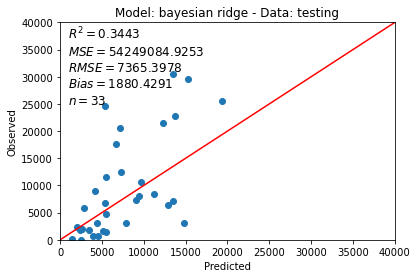

In [27]:

str_model, model = train_model_plot(X_train, y_train, BayesianRidge(),
                                    "bayesian_ridge", 0, 40000, 1000, 3000)

gradient_boosting_regressor
Train model
R2: 1.0
MSE: 2331.47
plot saved to: D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234\no0_values\gradient_boosting_regressor_train_plot.jpg


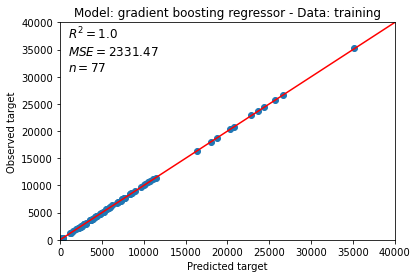

gradient_boosting_regressor
Test model
Predicted data r2 = 0.4689565683322139
MSE = 43935144.45309732
plot saved to: D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234\no0_values\gradient_boosting_regressor_test_plot.jpg


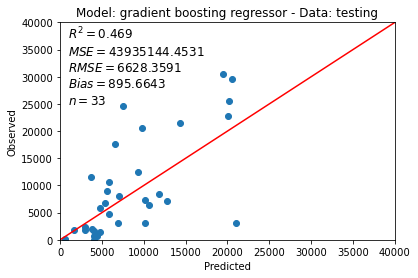

In [28]:
str_model, model = train_model_plot(X_train, y_train, GradientBoostingRegressor(),
                                    "gradient_boosting_regressor", 0, 40000, 1000, 3000)

svr
Train model
R2: -0.1
MSE: 57362299.11
plot saved to: D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234\no0_values\svr_train_plot.jpg


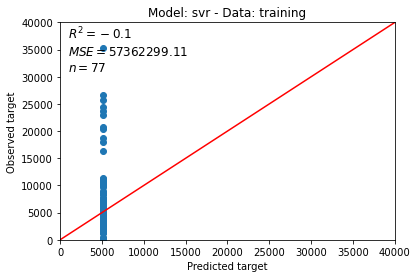

svr
Test model
Predicted data r2 = -0.2224106658086149
MSE = 101134457.14720117
plot saved to: D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234\no0_values\svr_test_plot.jpg


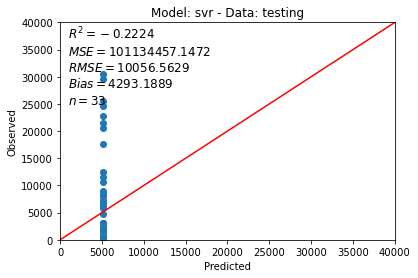

In [29]:
str_model, model = train_model_plot(X_train, y_train, SVR(),
                                    "svr", 0, 40000, 1000, 3000)

In [30]:
def train_poly_model_plot(X_train, y_train, model, str_model, x_limit, y_limit, x_off, y_off):
    
    print("="*50)
    print(str_model)
    print("Train model")
    print("="*50)

    
    x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
    x__ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
    
    model.fit(x_, y_train)

    r2 = round(model.score(x_, y_train), 2)
    mse = round(np.mean((y_train - model.predict(x_))**2), 2)
    
    print(f"R2: {r2}")
    print(f"MSE: {mse}")
#     print(f"Intercept: {model.intercept_}")
    #print(f"Slope: {model.coef_}")


    plt.scatter(model.predict(x_), y_train)  
    # data for the 1 for 1 line
    x = [x_limit,y_limit]
    y = [x_limit, y_limit]

    #sets the limits of the axis
    plt.xlim(x_limit, y_limit)
    plt.ylim(x_limit, y_limit)

    plt.ylabel('Observed target')

    plt.xlabel('Predicted target')

    # 1 for 1 line
    #adding text inside the plot
    plt.text((x_limit + x_off), (y_limit - y_off), f'$R^2 = {round(r2, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {round(mse, 4)}$', fontsize = 12)
#     plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {120}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*3)), f'$n = {len(y_train)}$', fontsize = 12)


    plt.plot(x, y, color = 'r')

    plot_out = os.path.join(model_outputs, f'{str_model}_train_plot.jpg')
    plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
    print(f"plot saved to: {plot_out}")
    plt.show()
    
    
    # ------------------------------------ Predict Test ----------------------------------
    print("="*50)
    print(str_model)
    print("Test model")
    print("="*50)

    
    # call the model
    y_test_predict = model.predict(x__)


    r2 = model.score(x__, y_test)
    mse = np.mean((y_test - model.predict(x__))** 2)
    rmse = np.sqrt(np.mean((y_test_predict - y_test) ** 2))
    bias = np.mean(y_test) - np.mean(y_test_predict)
    print('Predicted data r2 =', r2)
    print('MSE =', mse)
    print(f"Intercept: {model.intercept_}")
#     print(f"Slope: {model.coef_}")
    print('RMSE =', format(rmse, '.3f'))
    print('bias =' , format(bias, '.3f'))
    print('n =' , len(y_test))


    # r2 = round(rfrLCHM.score(X_1, y_1), 2)
    # mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
    # rmse = round(np.sqrt(np.mean((y2_predict - y_2) ** 2)), 2)
    # bias = round(np.mean(y_2) - np.mean(y2_predict), 2)

    plt.scatter(y_test_predict, y_test) #, s=10, c='b', marker='o')
    # data for the 1 for 1 line
    x = [x_limit,y_limit]
    y = [x_limit, y_limit]

    #sets the limits of the axis
    plt.xlim(x_limit, y_limit)
    plt.ylim(x_limit, y_limit)
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    # 1 for 1 line

    #adding text inside the plot
    plt.text((x_limit + x_off), (y_limit - y_off), f'$R^2 = {round(r2, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*2)), f'$MSE = {round(mse, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*3)), f'$RMSE = {round(rmse, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*4)), f'$Bias = {round(bias, 4)}$', fontsize = 12)
    plt.text((x_limit + x_off), (y_limit - (y_off*5)), f'$n = {len(y_test)}$', fontsize = 12)

    plt.plot(x, y, color = 'r')
    plot_out = os.path.join(model_outputs, f'{str_model}_test_plot.jpg')
    plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
    print(f"plot saved to: {plot_out}")
    plt.show()    
    
    
    return str_model, model

polynomia_features
Train model
R2: 0.95
MSE: 2724140.91
plot saved to: D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234\no0_values\polynomia_features_train_plot.jpg


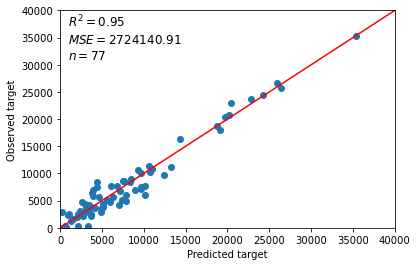

polynomia_features
Test model
Predicted data r2 = -4.382104382258615
MSE = 445280968.3636364
Intercept: -7074704.0
RMSE = 21101.682
bias = -455.757
n = 33
plot saved to: D:\cdu\data\zonal_stats\output\20230225\ml_svc_reg_dir\data_set\20230225_124234\no0_values\polynomia_features_test_plot.jpg


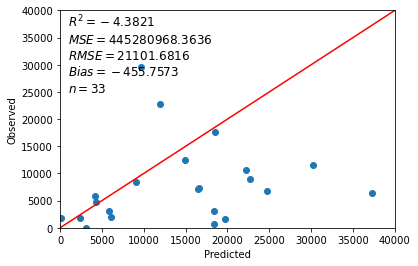

In [31]:
str_model, model = train_poly_model_plot(X_train, y_train, LinearRegression(),
                                    "polynomia_features", 0, 40000, 1000, 3000)
# PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [32]:
def reg_metrics(x, y):
    
    from sklearn import metrics
    try:
        ev = metrics.explained_variance_score(x, y)
    except:
        ev = np.nan
    print("Ev score: ", ev)
    
    try:
        me = metrics.max_error(x, y)
    except:
        me = np.nan
    print("Maximum Error: ", me)
    
    try:
        mae = metrics.mean_absolute_error(x, y)
    except:
        mae = np.nan
    print("Mean Absolute Error: ", mae)
    
    try:
        mse = metrics.mean_squared_error(x, y)
    except:
        mse = np.nan
    print("Mean Squared Error: ", mse)
    
    try:
        rmse = metrics.mean_squared_error(x, y, squared=False)
    except:
        rmse =  np.nan
    print("Root Mean Squared Error: ", rmse)
    
    try:
        msle = metrics.mean_squared_log_error(x, y)
    except:
        msle = np.nan
    print("Mean Squared Log Error: ", msle)
   
    try:
        rmsle = metrics.mean_squared_log_error(x, y, squared = False)
    except:
        rmsle =  np.nan
    print("Root Mean Squared Log Error : ", rmsle)
    
    try:
        mape = metrics.mean_absolute_percentage_error(x, y)
    except:
        mape = np.nan
    print("Mean Absolute Percentage Error: ", mape)
    
    try:
        medae = metrics.median_absolute_error(x, y)
    except:
        medae = np.nan
    print("Median Absolute Error: ", medae)
    
    try:
        r2 = metrics.r2_score(x, y)
    except:
        r2 = np.nan
    print("Coefficient of determination: ", r2)
    
    try:
        bias = bias = np.mean(x) - np.mean(y)
    except:
        bias = np.nan
    print("Bias: ", bias)
    
    n = len(x)
    print("n: ", n)
    
    return ev, me, mae, mse, rmse, msle, rmsle, mape, medae, r2, bias, n

In [33]:
# load and summarize the dataset
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# generate regression dataset
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, train_size=0.70, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (77, 170) (77,)
Test (33, 170) (33,)


Feature 0: 70.485720
Feature 1: 72.998482
Feature 2: 77.757416
Feature 3: 69.136390
Feature 4: 16.349111
Feature 5: 47.418957
Feature 6: 70.199440
Feature 7: 58.490621
Feature 8: 54.617134
Feature 9: 5.166928
Feature 10: 32.690776
Feature 11: 29.099543
Feature 12: 36.208770
Feature 13: 35.834357
Feature 14: 0.670410
Feature 15: 38.943694
Feature 16: 28.587459
Feature 17: 41.032188
Feature 18: 42.378017
Feature 19: 0.445020
Feature 20: 46.610060
Feature 21: 30.096762
Feature 22: 47.349708
Feature 23: 49.620594
Feature 24: 0.204551
Feature 25: 9.791462
Feature 26: 4.406145
Feature 27: 8.692403
Feature 28: 9.079124
Feature 29: 1.488904
Feature 30: 65.419156
Feature 31: 34.733977
Feature 32: 60.286102
Feature 33: 61.631734
Feature 34: 0.166389
Feature 35: 53.235025
Feature 36: 27.009938
Feature 37: 48.394450
Feature 38: 50.368377
Feature 39: 0.062020
Feature 40: 70.282673
Feature 41: 80.536918
Feature 42: 82.261810
Feature 43: 82.377383
Feature 44: 5.427221
Feature 45: 14.303340
Feature 46

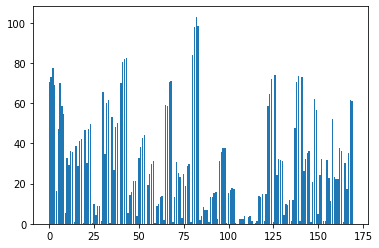

In [34]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_regression, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
 
# load the dataset
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 0.384119
Feature 1: 0.598362
Feature 2: 0.534308
Feature 3: 0.436386
Feature 4: 0.347299
Feature 5: 0.236524
Feature 6: 0.612627
Feature 7: 0.450269
Feature 8: 0.397083
Feature 9: 0.129647
Feature 10: 0.349805
Feature 11: 0.288259
Feature 12: 0.306959
Feature 13: 0.329317
Feature 14: 0.000000
Feature 15: 0.416001
Feature 16: 0.410640
Feature 17: 0.363999
Feature 18: 0.354242
Feature 19: 0.000000
Feature 20: 0.404680
Feature 21: 0.386934
Feature 22: 0.440771
Feature 23: 0.468199
Feature 24: 0.043258
Feature 25: 0.165425
Feature 26: 0.022553
Feature 27: 0.088891
Feature 28: 0.097275
Feature 29: 0.060961
Feature 30: 0.336636
Feature 31: 0.282371
Feature 32: 0.342154
Feature 33: 0.354737
Feature 34: 0.027235
Feature 35: 0.324533
Feature 36: 0.398790
Feature 37: 0.343219
Feature 38: 0.371645
Feature 39: 0.085172
Feature 40: 0.307380
Feature 41: 0.495672
Feature 42: 0.431964
Feature 43: 0.331517
Feature 44: 0.260422
Feature 45: 0.218699
Feature 46: 0.303045
Feature 47: 0.236468
Fe

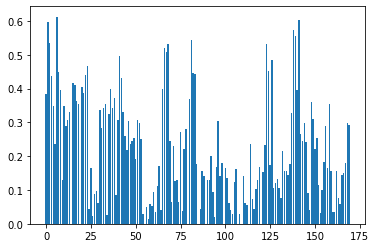

In [35]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=mutual_info_regression, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
 
# load the dataset
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

https://machinelearningmastery.com/feature-selection-for-regression-data/

In [36]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# load the dataset
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 8473.623


Discard less features (keep 10)

In [37]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=10)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs
 
# load the dataset
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 4054.689


Discard less features (keep 88)

In [38]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=5)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    
    # Get columns to keep and create new dataframe with those only
    cols_idxs =fs.get_support(indices=True)
    features_df_new = X_train.iloc[:,cols_idxs]
    
    
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs, features_df_new
 
# load the dataset
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs, features_df_new = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3936.133


In [39]:
features_df_new

,b1_dja_0305_med,b2_dim_0911_min,b2_dim_0911_max,b2_dim_0911_mean,b2_dim_0911_med
166,18.33,34.00,42.00,37.65,37.50
45,5.00,4.00,16.00,7.25,5.50
55,24.50,24.00,33.00,27.50,27.50
139,16.00,19.00,27.00,22.76,23.00
59,25.00,20.00,38.00,26.56,25.50
...,...,...,...,...,...
21,15.00,20.00,24.00,21.94,22.50
116,17.00,14.00,21.00,17.90,18.00
24,12.50,7.00,28.00,13.75,11.00
164,26.00,20.00,36.00,30.96,33.00


88 top selected features chosen using mutual information

## f_regression

In [49]:
#random_state:
rs = 5
# test size:
ts = 0.3
#number of features:
k = 5

MAE: 4262.703
Ev score:  0.420665515329929
Maximum Error:  17958.6328125
Mean Absolute Error:  4262.702977035985
Mean Squared Error:  35608173.22664252
Root Mean Squared Error:  5967.258434712085
Mean Squared Log Error:  nan
Root Mean Squared Log Error :  nan
Mean Absolute Percentage Error:  1.7386430870463208
Median Absolute Error:  2631.455078125
Coefficient of determination:  0.4178727169640376
Bias:  413.318566524621
n:  33


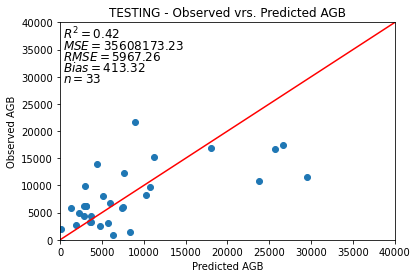

In [50]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=k)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    
    # Get columns to keep and create new dataframe with those only
    cols_idxs =fs.get_support(indices=True)
    features_df_new = X_train.iloc[:,cols_idxs]

    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs, features_df_new
 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, test_size=ts, random_state=rs)
# feature selection
X_train_fs, X_test_fs, fs, features_df_new = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)


# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

test_ev, test_me, test_mae, test_mse, test_rmse, test_msle, test_rmsle, test_mape, test_medae, test_r2, \
test_bias, test_n = reg_metrics(y_test, yhat)

#plt.scatter(rfrLCHM.predict(X_1), y_1,) 
# print()
plt.scatter(y_test, yhat)  
# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)
#adding text inside the plot

plt.text(300, 37000, f'$R^2 = {round(test_r2, 2)}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {round(test_mse, 2)}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {round(test_rmse, 2)}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {round(test_bias, 2)}$', fontsize = 12)
plt.text(300, 29000, f'$n = {test_n}$', fontsize = 12)

#sets the limits of the axis
plt.xlim(-1,40000)
plt.ylim(-1, 40000)
plt.title('TESTING - Observed vrs. Predicted AGB')
plt.ylabel('Observed AGB')
plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

In [41]:
for f in features_df_new.columns:
    print(f)

b1_fpca2_0509_min
b1_fpca2_0509_max
b1_fpca2_0509_mean
b1_fpca2_0509_med
b1_h99a_01122_max
b3_dbi_0608_min
b3_dbi_0608_mean
b3_dbi_0608_med
b5_dbi_0608_min
b5_dbi_0608_mean
b5_dbi_0608_med
b6_dbi_0608_min
b6_dbi_0608_med
b1_dja_0305_max
b1_dja_0305_mean
b1_dja_0305_med
b2_dim_0608_mean
b2_dim_0608_med
b2_dim_0911_max
NDVIm


## mutual_info_regression

MAE: 3996.869
Ev score:  0.5235950362299446
Maximum Error:  16370.052734375
Mean Absolute Error:  3996.8688243519177
Mean Squared Error:  29143308.81795475
Root Mean Squared Error:  5398.454298959541
Mean Squared Log Error:  nan
Root Mean Squared Log Error :  nan
Mean Absolute Percentage Error:  1.4015941543320363
Median Absolute Error:  3040.2587890625
Coefficient of determination:  0.5235612039715514
Bias:  45.49190636837102
n:  33


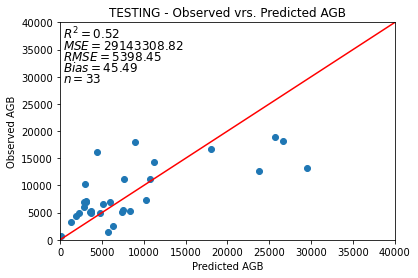

In [51]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=k)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    
    # Get columns to keep and create new dataframe with those only
    cols_idxs =fs.get_support(indices=True)
    features_df_new = X_train.iloc[:,cols_idxs]

    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs, features_df_new
 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, test_size=ts, random_state=rs)
# feature selection
X_train_fs, X_test_fs, fs, features_df_new = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)


# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

test_ev, test_me, test_mae, test_mse, test_rmse, test_msle, test_rmsle, test_mape, test_medae, test_r2, \
test_bias, test_n = reg_metrics(y_test, yhat)

#plt.scatter(rfrLCHM.predict(X_1), y_1,) 
# print()
plt.scatter(y_test, yhat)  
# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)
#adding text inside the plot

plt.text(300, 37000, f'$R^2 = {round(test_r2, 2)}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {round(test_mse, 2)}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {round(test_rmse, 2)}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {round(test_bias, 2)}$', fontsize = 12)
plt.text(300, 29000, f'$n = {test_n}$', fontsize = 12)

#sets the limits of the axis
plt.xlim(-1,40000)
plt.ylim(-1, 40000)
plt.title('TESTING - Observed vrs. Predicted AGB')
plt.ylabel('Observed AGB')
plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

In [47]:
for f in features_df_new.columns:
    print(f)

b1_fpca2_0509_max
b3_dbi_0608_min
b3_dbi_0608_med
b2_dim_0911_max
b2_dp1_0509_max
b2_dp1_0509_mean
b2_dp1_0509_med


Tune the Number of Selected Features

In [44]:
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# define dataset
X = xdata1
y = ydata
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=10)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-7, X.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=None, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Best MAE: -154430142.407
Best Config: {'sel__k': 166}
>-155563207.641 with: {'sel__k': 163}
>-165166216.870 with: {'sel__k': 164}
>-438421301.619 with: {'sel__k': 165}
>-154430142.407 with: {'sel__k': 166}
>-157204724.134 with: {'sel__k': 167}
>-436452823.571 with: {'sel__k': 168}
>-503285713.668 with: {'sel__k': 169}
>-567777651.910 with: {'sel__k': 170}


In [45]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# define dataset
X = xdata1
y = ydata
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# define number of features to evaluate
num_features = [i for i in range(X.shape[1]-10, X.shape[1]+1)]
# enumerate each number of features
results = list()
for k in num_features:
 # create pipeline
 model = LinearRegression()
 fs = SelectKBest(score_func=f_regression, k=k)
 pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
 # evaluate the model
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=None)
 results.append(scores)
 # summarize the results
 print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

>160 -8477.939 (2794.479)


KeyboardInterrupt: 

In [ ]:
num_features